In [1]:
# importing all the  necessary libraries required for the project

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

importing the data


In [8]:
df=pd.read_csv('/content/Heart_disease_cleveland_new.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


chesking the null values

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

from the below graph we can say that the person whose age is above 55 has more chance of having a defective heart


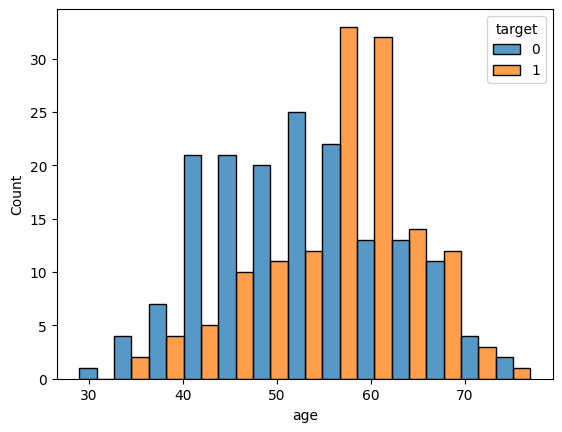

In [36]:
sns.histplot(data = df,x='age',hue='target',multiple='dodge');




from here we can say that males have a larger chance of heart disease


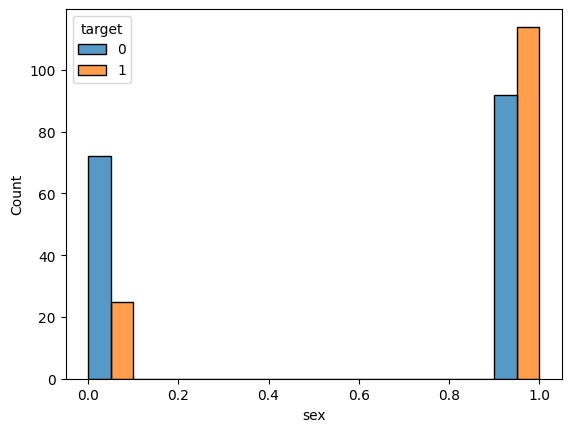

In [37]:
sns.histplot(data = df,x='sex',hue='target',multiple='dodge');


the people who have a asymptomatic chest pain have a greater chance of heart disease


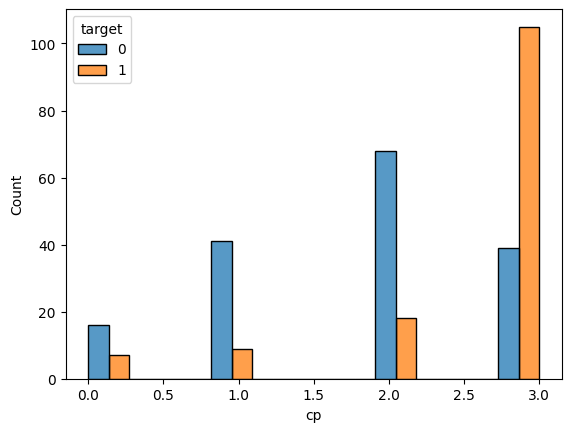

In [38]:
sns.histplot(data = df,x='cp',hue='target',multiple='dodge');


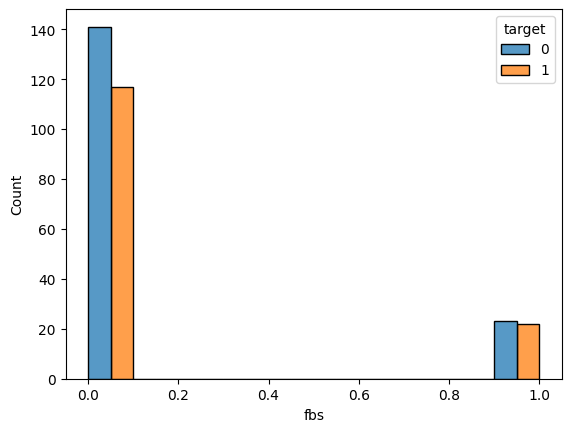

In [39]:
sns.histplot(data = df,x='fbs',hue='target',multiple='dodge');


describing the data

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [15]:
df1=df[df.target==1]
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
6,62,0,3,140,268,0,2,160,0,3.6,2,2,1,1
8,63,1,3,130,254,0,2,147,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,3,140,241,0,0,123,1,0.2,1,0,3,1
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1


In [16]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0
mean,56.625899,0.820144,2.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,0.827338,1.129496,2.366906,1.0
std,7.938416,0.385457,0.823680,18.769019,49.486835,0.366317,0.977486,22.593233,0.499609,1.302580,0.563736,1.020333,0.885830,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,52.000000,1.000000,3.000000,120.000000,217.500000,0.000000,0.000000,125.000000,0.000000,0.550000,0.000000,0.000000,1.000000,1.0
50%,58.000000,1.000000,3.000000,130.000000,249.000000,0.000000,2.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,1.0
75%,62.000000,1.000000,3.000000,145.000000,283.500000,0.000000,2.000000,156.500000,1.000000,2.500000,1.000000,2.000000,3.000000,1.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.0


In [17]:
df2=df[df['target']==0]
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,56,1,1,130,221,0,2,163,0,0.0,0,0,3,0
289,56,1,1,120,240,0,0,169,0,0.0,2,0,1,0
291,55,0,1,132,342,0,0,166,0,1.2,0,0,1,0
295,41,1,1,120,157,0,0,182,0,0.0,0,0,1,0


In [18]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0
mean,52.585366,0.560976,1.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,0.408537,0.268293,1.378049,0.0
std,9.511957,0.497788,0.916620,16.204739,53.456580,0.348303,0.986270,19.199080,0.348303,0.781734,0.594598,0.627563,0.761662,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,44.750000,0.000000,1.000000,120.000000,208.750000,0.000000,0.000000,148.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,52.000000,1.000000,2.000000,130.000000,234.500000,0.000000,0.000000,161.000000,0.000000,0.200000,0.000000,0.000000,1.000000,0.0
75%,59.000000,1.000000,2.000000,140.000000,267.250000,0.000000,2.000000,172.000000,0.000000,1.025000,1.000000,0.000000,1.000000,0.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,3.000000,3.000000,0.0


In [19]:
X=df.drop('target',axis='columns')
y=df.target

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


model training


In [28]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [25]:
model.score(X_test,y_test)

0.8852459016393442

Text(95.72222222222221, 0.5, 'truth')

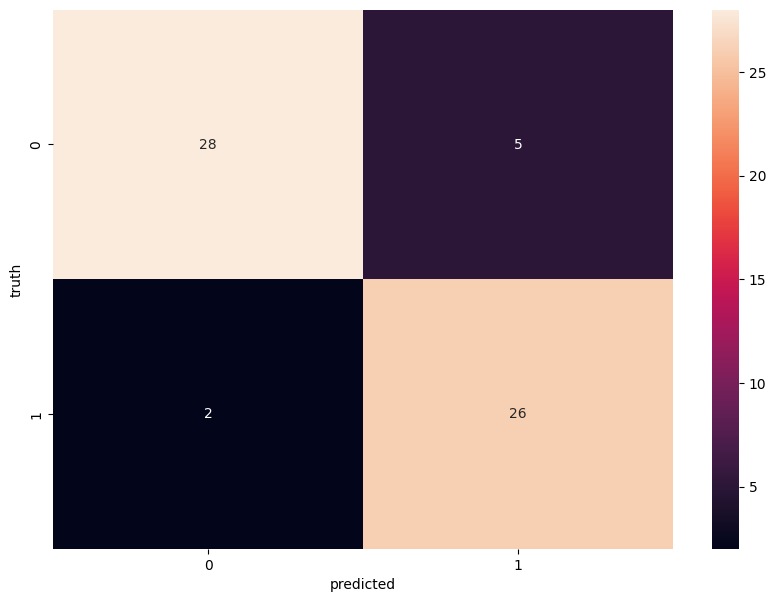

In [29]:
# plotting confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

